In [131]:
from Immanip import SwapPalettes
filename0 = '/home/jack/Desktop/text_stuff/instagram/PalletteTemp.png'
filename1 = '/home/jack/Desktop/text_stuff/instagram/colors.jpg'
filename = 'instagram/post-056.jpg'
SwapPalettes.swappalettes(filename0,filename1,filename)

(5, 20, 13)
instagram/post-056.jpg


# Download images from search

In [127]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import json
import urllib2
import sys
import time
# adding path to geckodriver to the OS environment variable
# assuming that it is stored at the same path as this script
#os.environ["PATH"] += os.pathsep + os.getcwd()
download_path = "search/"

def main():
    #searchtext = sys.argv[1] # the search query
    #num_requested = int(sys.argv[2]) # number of images to download
    searchtext=raw_input("search")
    num_requested =int(raw_input("how many"))
    
    number_of_scrolls = num_requested / 400 + 1 
    # number_of_scrolls * 400 images will be opened in the browser

    if not os.path.exists(download_path + searchtext.replace(" ", "_")):
        os.makedirs(download_path + searchtext.replace(" ", "_"))

    url = "https://www.google.co.in/search?q="+searchtext+"&source=lnms&tbm=isch"
    #url = "https://duckduckgo.com/?q="+searchtext+"&t=hb&iax=1&ia=images"
    driver = webdriver.Firefox()
    driver.get(url)

    headers = {}
    headers['User-Agent'] = "Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/41.0.2228.0 Safari/537.36"
    extensions = {"jpg", "jpeg", "png", "gif"}
    img_count = 0
    downloaded_img_count = 0

    for _ in xrange(number_of_scrolls):
        for __ in xrange(10):
            # multiple scrolls needed to show all 400 images
            driver.execute_script("window.scrollBy(0, 1000000)")
            time.sleep(0.2)
        # to load next 400 images
        time.sleep(0.5)
        try:
            driver.find_element_by_xpath("//input[@value='Show more results']").click()
        except Exception as e:
            print "Less images found:", e
            break

    # imges = driver.find_elements_by_xpath('//div[@class="rg_meta"]') # not working anymore
    imges = driver.find_elements_by_xpath('//div[contains(@class,"rg_meta")]')
    print "Total images:", len(imges), "\n"
    for img in imges:
        img_count += 1
        img_url = json.loads(img.get_attribute('innerHTML'))["ou"]
        img_type = json.loads(img.get_attribute('innerHTML'))["ity"]
        print "Downloading image", img_count, ": ", img_url
        try:
            if img_type not in extensions:
                img_type = "jpg"
            req = urllib2.Request(img_url, headers=headers)
            raw_img = urllib2.urlopen(req).read()
            f = open(download_path+searchtext.replace(" ", "_")+"/"+str(downloaded_img_count)+"."+img_type, "wb")
            f.write(raw_img)
            f.close
            downloaded_img_count += 1
        except Exception as e:
            print "Download failed:", e
        finally:
            print
        if downloaded_img_count >= num_requested:
            break

    print "Total downloaded: ", downloaded_img_count, "/", img_count
    driver.quit()

if __name__ == "__main__":
    main()

searchjesse jane xxx
how many20
Total images: 400 





















Total downloaded:  20 / 20


# Palette Swap

In [ ]:
import os
import sys
from PIL import Image
import shutil
import time
import random
filename0= '/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-052.jpg'
filename1='/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/captain.jpg'
shutil.copy2(filename0, 'instagram/')
shutil.copy2(filename1, 'instagram/')
aa = Image.open(filename0).convert("RGB")
bb = Image.open(filename1).convert("RGB")
xx=aa.resize((640,640), Image.NEAREST)
yy=bb.resize((640,640), Image.NEAREST)
xx.save("junk/aa.png")
yy.save("junk/bb.png")
src = Image.open('junk/aa.png').convert('RGB')
dst = Image.open('junk/bb.png').convert('RGB')
src.save("junk/aa.png")
dst.save("junk/bb.png")
n = 5 #number of partitions per channel.
src_handle = Image.open("junk/bb.png")
dst_handle = Image.open("junk/aa.png")
src = src_handle.load()
dst = dst_handle.load()
assert src_handle.size[0]*src_handle.size[1] == dst_handle.size[0]*dst_handle.size[1],"images must be same size"
def makePixelList(img):
    l = []
    for x in range(img.size[0]):
        for y in range(img.size[1]):
            l.append((x,y))
    return l
lsrc = makePixelList(src_handle)
ldst = makePixelList(dst_handle)
def sortAndDivide(coordlist,pixelimage,channel): #core
    global src,dst,n
    retlist = []
    #sort
    coordlist.sort(key=lambda t: pixelimage[t][channel])
    #divide
    partitionLength = int(len(coordlist)/n)
    if partitionLength <= 0:
        partitionLength = 1
    if channel < 2:
        for i in range(0,len(coordlist),partitionLength):
            retlist += sortAndDivide(coordlist[i:i+partitionLength],pixelimage,channel+1)
    else:
        retlist += coordlist
    return retlist

print(src[lsrc[0]])
lsrc = sortAndDivide(lsrc,src,0)
ldst = sortAndDivide(ldst,dst,0)
for i in range(len(ldst)):
    dst[ldst[i]] = src[lsrc[i]]
filename = time.strftime("/home/jack/Desktop/3DFRACT/Mandelbulb3Dv199/post-053.jpg")
dst_handle.save(filename)
shutil.copy2(filename, "instagram/")
print filename

# Blend images

In [31]:
from PIL import Image
overlay = Image.open('/home/jack/Desktop/text_stuff/instagram/post-054.jpg').convert("RGBA") 
overlay.load()
overlay.split()
base = Image.open('/home/jack/Desktop/text_stuff/instagram/use001.png').convert("RGBA")
base.load()
base.split()
"""
card = Image.new("RGBA", (220, 220), (255, 255, 255))
img = Image.open("/Users/paulvorobyev/test.png").convert("RGBA")
x, y = img.size
card.paste(img, (0, 0, x, y), img)
card.save("test.png", format="png")
"""

bands = list(overlay.split())
if len(bands) == 4:
    # Assuming alpha is the last band
    bands[3] = bands[3].point(lambda x: x*0.4)
overlay = Image.merge(overlay.mode, bands)

base.paste(overlay, (0, 0), overlay)
base.save('result.png')

In [32]:
!showme result.png

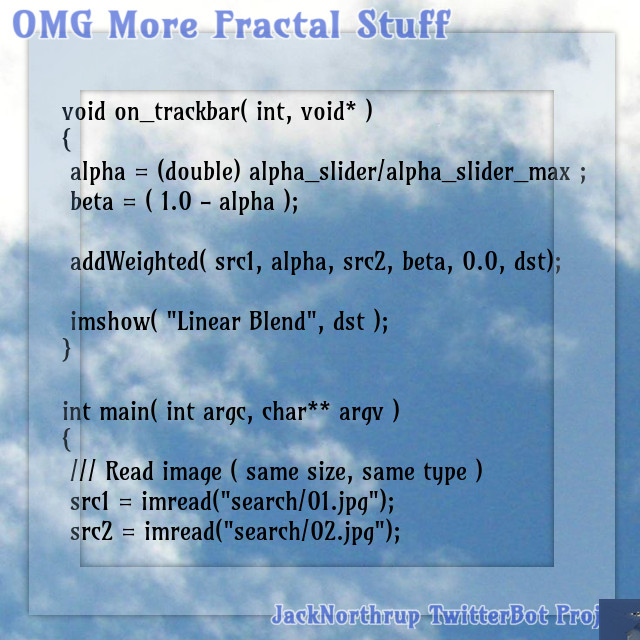

In [129]:
from PIL import Image
import time
import numpy as np
mv = 0
for i in xrange(600): 
    background = Image.open("/home/jack/Desktop/text_stuff/instagram/post-054.jpg")
    foreground = Image.open("/home/jack/Desktop/text_stuff/instagram/use001.png")

    background.paste(foreground, (1*mv, 1*mv), foreground)
    background.save("abc.png")
    mv = mv + 1
    #time.sleep(2)
    #filename = datetime.datetime.now().strftime("/notebooks/%d_%m_%Y_%H:%M:%S.jpg")
    filename = ("video/%004d.jpg"%mv)
    
    Image.fromarray(np.uint8(background)).save(filename)  
    
from PIL import Image
merge =Image.open("abc.png")
merge

# Making one blended image

In [126]:
# Making one blended image
from PIL import Image
background = Image.open("instagram/conduit.jpg")
background = background.convert("RGBA")
overlay = Image.open("instagram/MutaGen.png")
overlay = overlay.convert("RGBA")
new_img = Image.blend(background, overlay, 0.5)
#new_img.save("snakewave.png","PNG")
new_img.save("snakewave.jpg","JPEG")

In [124]:
from PIL import Image, ImageOps
mask = Image.open('instagram/post-color5.png').convert('L')
im = Image.open('instagram/MutaGen.png')
output = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
output.putalpha(mask)
output.save('output2.jpg')

In [123]:
from PIL import Image, ImageOps
mask = Image.open('instagram/post-color5.png').convert('L')
im = Image.open('instagram/MutaGen.png')
output = ImageOps.fit(im, mask.size, centering=(0.5, 0.5))
output.putalpha(mask)
output.save('output2.png')

In [50]:
!wget -O oceanlarge.jpg https://static.pexels.com/photos/37403/bora-bora-french-polynesia-sunset-ocean.jpg

--2017-10-05 16:36:25--  https://static.pexels.com/photos/37403/bora-bora-french-polynesia-sunset-ocean.jpg
Resolving static.pexels.com (static.pexels.com)... 104.16.238.112, 104.16.241.112, 104.16.242.112, ...
Connecting to static.pexels.com (static.pexels.com)|104.16.238.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8762544 (8.4M)
Saving to: ‘oceanlarge.jpg’

oceanlarge.jpg      100%[===================>]   8.36M   134KB/s    in 42s     

2017-10-05 16:37:07 (204 KB/s) - ‘oceanlarge.jpg’ saved [8762544/8762544]



In [88]:
from PIL import Image
im = Image.open('oceanlarge.jpg')
im.size

(7020, 3163)

In [118]:
from PIL import Image
im = Image.open('reducedsize.jpg')

y0,x0 = im.size
r = float(x0/640)
x = x0/float(r)
y= y0/float(r)
x = int(x)
y= int(y)
imn = im.resize((y,x), Image.NEAREST)
imn.save("reducedsize.jpg")
image = cv2.imread("reducedsize.jpg")
imn.size

y0,x0 = im.size
rs = x0-640
print rs

150


In [119]:
from PIL import Image
im = Image.open('reducedsize.jpg')

y0,x0 = im.size
r = float(x0/640)
x = x0/float(r)
y= y0/float(r)
x = int(x)
y= int(y)
imn = im.resize((y,x), Image.NEAREST)
imn.save("reducedsize.jpg")
image = cv2.imread("reducedsize.jpg")
imn.size

y0,x0 = im.size
rs = x0-640

x = x0 - rs
y = y0 - rs

#xx = x - 640
#yy = y - 640

cropped = image[0:x, 0:y]
#htop hbottom   wleft wright

r = 640.0 / image.shape[1]
dim = (640, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

cv2.imshow("cropped", cropped)
cv2.imshow("resized", resized)
cv2.imwrite("01a.jpg",cropped)
cv2.imwrite("02a.jpg",resized)
cv2.waitKey(0)


255

In [115]:
import cv2
from PIL import Image

image = cv2.imread("oceanlarge.jpg")
im = Image.open('oceanlarge.jpg')

y0,x0 = im.size
x = x0 - 1000
y = y0 - 3000

xx = x - 640
yy = y - 640

cropped = image[xx:x, yy:y]
#cropped = image[1600:2070, 2700:3240]
#htop hbottom   wleft wright

r = 640.0 / image.shape[1]
dim = (640, int(image.shape[0] * r))
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

cv2.imshow("cropped", cropped)
cv2.imshow("resized", resized)

cv2.imwrite("01.jpg",cropped)
cv2.imwrite("02.jpg",resized)
cv2.waitKey(0)

255

In [68]:
!ls instagram

0489~.png	 MutaGen0003.jpg		  post-050.jpg
0489vvvppr~.png  MutaGen0005.jpg		  post-051.jpg
16.png		 MutaGen255.jpg			  post-052.jpg
2560.jpg	 MutaGen2560.jpg		  post-053.jpg
3post.jpg	 MutaGen2.jpg			  post-054.jpg
640cloud.jpg	 MutaGen2.png			  post-05.jpg
640fish.jpg	 MutaGen5B93367881C0506~.png	  post-color1.png
6.png		 MutaGen5FE1F60B7C7C~.png	  post-color2560.jpg
aa.png		 MutaGen691B243D5CE44A090452.jpg  post-color2.png
bb.png		 MutaGen.png			  post-color3.png
captain.jpg	 Pallette.png			  post-color4.png
cloud.jpg	 PalletteTemp2.png		  post-color5.png
colors2560.jpg	 PalletteTemp4.png		  post-color6.png
colors2.jpg	 PalletteTemp.png		  post-forest2560.jpg
colors.jpg	 post0001.png			  sea1.jpg
conduit.jpg	 post0002.png			  sea3.jpg
fish.jpg	 post-005.jpg			  stage.jpg
forest.jpg	 post-021.jpg			  use001.jpg
forestlarge.jpg  post-022-BORDER.jpg		  use001.png
meat640.jpg	 post-022-BORDER-txt.jpg	  use002.jpg
multi001.jpg	 post-022.jpg			  volcano.jpg
MutaGen0001.jpg  post-029.jpg
M

# Blend Images in Steps

In [45]:
#Making a series os blended images
from PIL import Image
background = Image.open("instagram/post-005.jpg")
overlay = Image.open("instagram/post-022.jpg")
background = background.convert("RGBA")
overlay = overlay.convert("RGBA")
#auto encrement while changing alpha value of overlay
for i in range(10):
    imagea = i *.1
    new_img = Image.blend(background, overlay, imagea)
    new_img.save('video/morph_001%d.jpg'%(i,),"JPEG")

# Add a Border to an Image

In [47]:
from PIL import Image
img = Image.open('instagram/post-022.jpg', 'r')
img_w, img_h = img.size
background = Image.new('RGBA', (680, 680), (255, 255, 235, 255))
bg_w, bg_h = background.size
offset = ((bg_w - img_w) / 2, (bg_h - img_h) / 2)
background.paste(img, offset)
background.save('instagram/post-022-BORDER.jpg')

# Add Text Inside the Border

In [48]:
import PIL
from PIL import ImageFont
from PIL import Image
from PIL import ImageDraw
font = ImageFont.truetype("/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf", 15)
#img = Image.new("RGBA", (200,200), (120,20,20))
img = Image.open("instagram/post-022-BORDER.jpg")
draw = ImageDraw.Draw(img)
draw.text((50,5), "PYTHON _ Draw a border and add text", (0,0,0), font=font)
draw = ImageDraw.Draw(img)
img.save("instagram/post-022-BORDER-txt.jpg")

In [36]:
#! /usr/bin/env python
import urllib
SAT_ZOOM_LEVEL = 0.0001389 #Like in request form
def retrieveImage(coordinates, image_size, name):
    """Retrieve satellite images from the Nasa's site
    coordinates: tuple (longitude, latitude) in decimal degrees
        image_size: tuple (width, height)
        name: output filename
        """
    request1 = "http://onearth.jpl.nasa.gov/landsat.cgi?" \
        "zoom=%f&x0=%f&y0=%f&x=%i&y=%i&action=pan&layer=modis%%252Cglobal_mosaic&pwidth=%i&pheight=%i" % \
        (SAT_ZOOM_LEVEL,
        coordinates[0],
        coordinates[1],
        image_size[0]/2,
        image_size[1]/2,
        image_size[0],
        image_size[1])
    for line in urllib.urlopen(request1):
        if line.startswith("<td align=left><input type=image src="):
            request2 = "http://onearth.jpl.nasa.gov/%s" % (line.split("\"")[1],)
            break
            urllib.urlretrieve(request2, name)

if __name__ == '__main__':
    retrieveImage((60.7376856, 56.5757572), (800,600), "test.jpg")
    # Specified coordinates is the point accurately at the image center


In [20]:
########################################################################
#
#        Infrared Global Geostationary Composite Quick View
#
#        Description: This code generates a PNG image of an Infrared 
#                Global Geostationary Composite data file
#
#        Authors: Matthew Smith, Leigh Sinclair
#        Information and Technology Systems Center (ITSC)
#        University of Alabama in Huntsville
#
#        Last Edited: 5 July 2017
#
#
########################################################################

#Import Python packages
import sys
import os
import struct
import matplotlib.pyplot as plt
 
# Define the file path to the desired date file 
globir="C:/Users/lsinclair/Desktop/globalIR/globir.17019.0545" #Place path to file here using forward slashes
try:
    IN=open(globir, 'rb')
except:
    print 'Error: opening file', globir
    exit(1)

# Read the first 768 bytes of the file containing the header and navigation information
dataOffset=768
header=struct.unpack('<192I', IN.read(768))
 
# Extract the data parameters
lines=header[8]
elements=header[9]
arraySize=lines*elements
format="%4dB" % (arraySize)
dataOffset=header[33]   # offset to data array (bytes)
 
# Read image array into a 1D array
IN.seek(dataOffset)
array=struct.unpack(format, IN.read(arraySize))
IN.close()
 
# Set up 2D array and reshape to 2D array to plot the data
array2D=[]
for n in range(0,lines):
    array2D.append(array[n*elements:(n+1)*elements])
 
# Create a plot of the data. The generated PNG image will save to the same folder where the data file is saved.
fig=plt.imshow(array2D, cmap='gray', interpolation='none')
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
try:
    plt.savefig(globir+".png", dpi=400, bbox_inches='tight', pad_inches=0)
except:
    print 'Error: saving figure to',globir+".png"
    exit(1)
else:
    print 'Success, saved to', globir+".png"
plt.close('all')
exit(0)

print "Image created"


Error: opening file C:/Users/lsinclair/Desktop/globalIR/globir.17019.0545


NameError: name 'IN' is not defined

search/PILStuff20171005145934.png


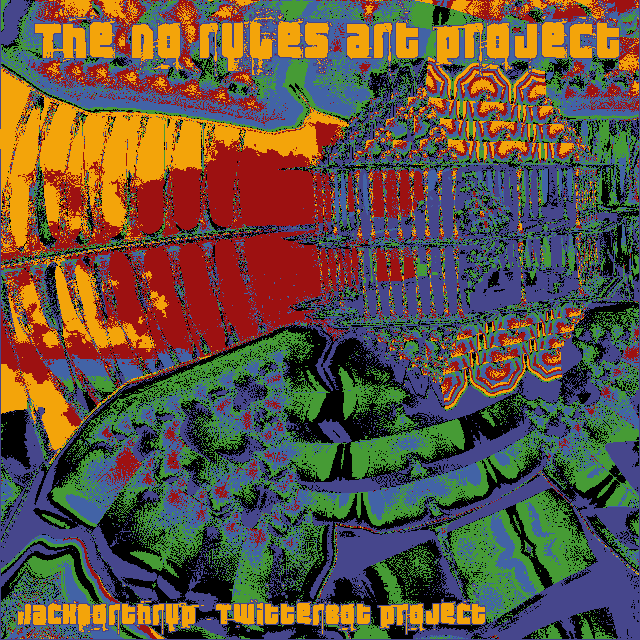

In [35]:
from PIL import Image, ImageFilter
import os
import cv2
import random
import time
path = r"instagram/"
#path = r"crawler4/"
base_image = random.choice([
    x for x in os.listdir(path)
    if os.path.isfile(os.path.join(path, x))
    ])
filename0=(path+base_image)
im = Image.open(filename0)
imP = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=6)
imP.putpalette([
     243,164,10,
     157,17,17,
     66,99,166,
     70,155,53,
     0,0,0,
     70,70,140,
     ])


im2 = Image.open(filename0)
mask0 = im2.convert('L') # need a greyscale image to create a mask
mask = Image.eval(mask0, lambda a: 255 if a == 0 else 0)
mask = mask.filter(ImageFilter.MinFilter(3))
imP.paste(2, mask) # Paste the color of index 2 using image2 as a mask
filename = time.strftime("search/PILStuff%Y%m%d%H%M%S.png")
imP.save(filename)

print filename
imP

In [ ]:
jacknorthrup
Lloyd1948